# Profit and Loss in Trading

https://www.investopedia.com/ask/answers/how-do-you-calculate-percentage-gain-or-loss-investment/

https://www.investopedia.com/ask/answer/07/portfolio_calculations.asp

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf

In [7]:
# input
symbol = 'ftec'
start = '2024-10-01'
end = '2025-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-01,174.149994,174.149994,168.960007,170.029999,170.029999,250800
2024-10-02,169.820007,171.889999,169.000000,171.169998,171.169998,157400
2024-10-03,170.779999,173.029999,170.649994,171.850006,171.850006,140000
2024-10-04,173.990005,174.210007,171.990005,173.970001,173.970001,198000
2024-10-07,173.240005,174.279999,172.389999,172.809998,172.809998,185900


In [8]:
# %%
Start = 100000  # Initial investment amount

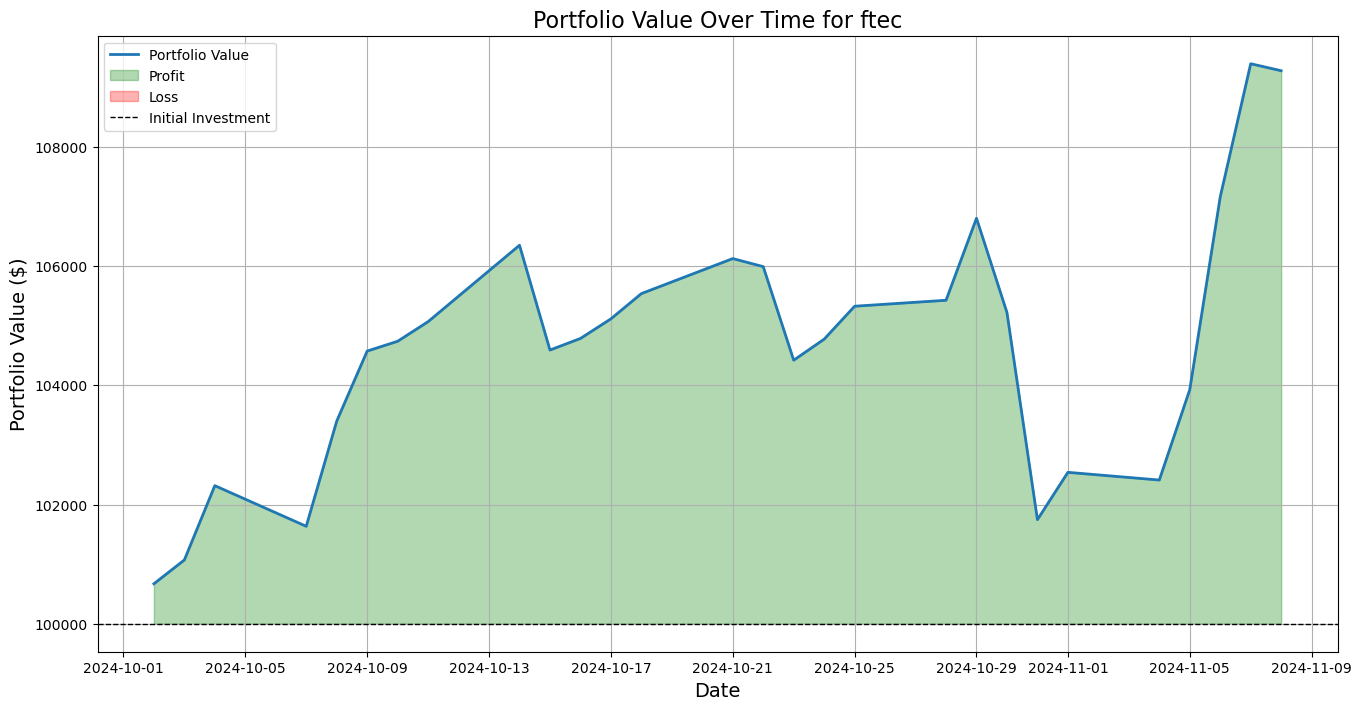

Financial Analysis
--------------------------------------------------
ftec profit or loss: $9278.64
Percentage gain or loss: 8.49%
Percentage of returns: 9.28%
Net gains or losses: 9.28%
Total Returns: 9.28%


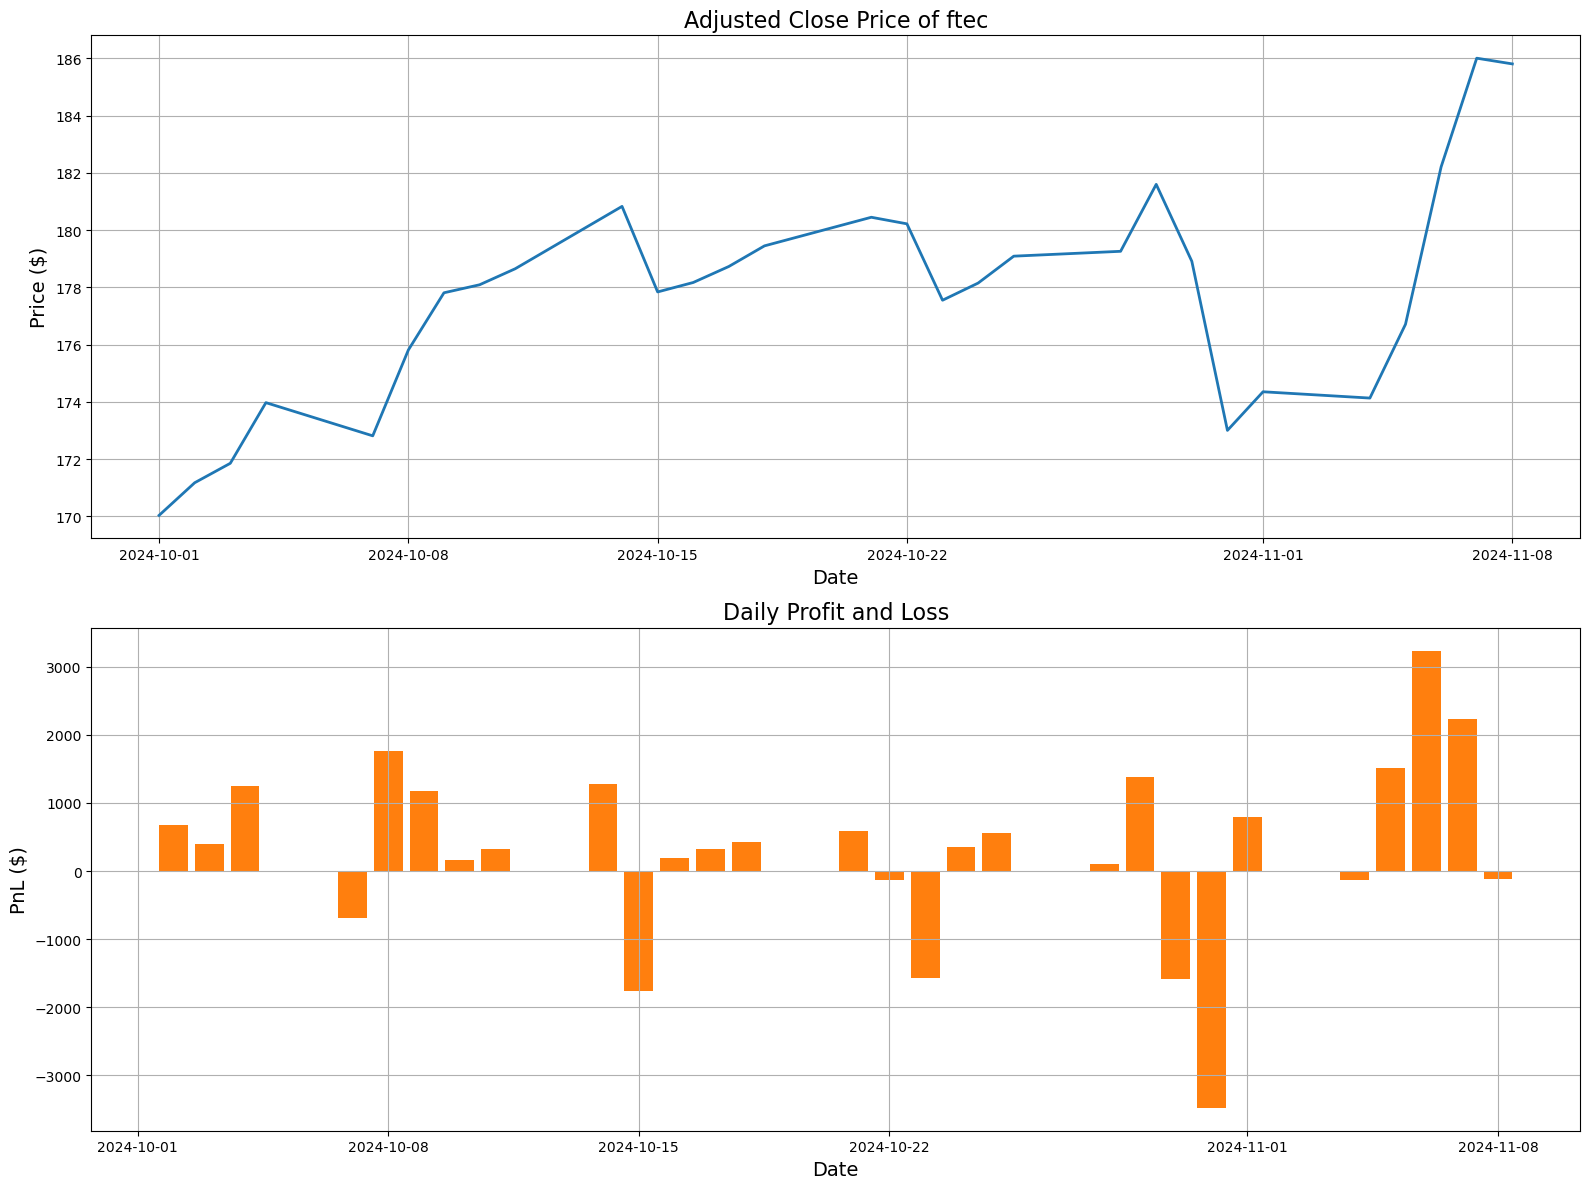

In [9]:
dataset['Shares'] = dataset['End'] = Start / dataset['Adj Close'][0]  # Initial number of shares

dataset['PnL'] = dataset['Shares'] * (dataset['Adj Close'] - dataset['Adj Close'].shift(1))
dataset['End'] = Start + dataset['PnL'].cumsum()  # Cumulative sum of PnL

plt.figure(figsize=(16, 8))
plt.plot(dataset.index, dataset['End'], label='Portfolio Value', linewidth=2, color='tab:blue')
plt.fill_between(dataset.index, Start, dataset['End'], where=(dataset['End'] >= Start), interpolate=True, color='green', alpha=0.3, label='Profit')
plt.fill_between(dataset.index, Start, dataset['End'], where=(dataset['End'] < Start), interpolate=True, color='red', alpha=0.3, label='Loss')

plt.title(f'Portfolio Value Over Time for {symbol}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Portfolio Value ($)', fontsize=14)
plt.axhline(Start, color='black', linestyle='--', linewidth=1, label='Initial Investment')
plt.legend()
plt.grid(True)
plt.show()

# Summary calculations
Shares = int(Start / dataset['Adj Close'][0])  # Total shares purchased
Purchase_Price = dataset['Adj Close'][0]  # Initial purchase price
Current_Value = dataset['Adj Close'][-1]  # Current value of stock at the end date
Purchase_Cost = Shares * Purchase_Price
Current_Value = Shares * Current_Value
Profit_or_Loss = Current_Value - Purchase_Cost
percentage_gain_or_loss = (Profit_or_Loss / Current_Value) * 100
percentage_returns = ((Current_Value - Purchase_Cost) / Purchase_Cost) * 100
net_gains_or_losses = ((dataset['Adj Close'][-1] - dataset['Adj Close'][0]) / dataset['Adj Close'][0]) * 100

total_return = ((Current_Value / Purchase_Cost) - 1) * 100

# Print results
print("Financial Analysis")
print('-' * 50)
print(f'{symbol} profit or loss: ${Profit_or_Loss:.2f}')
print(f'Percentage gain or loss: {percentage_gain_or_loss:.2f}%')
print(f'Percentage of returns: {percentage_returns:.2f}%')
print(f'Net gains or losses: {net_gains_or_losses:.2f}%')
print(f'Total Returns: {total_return:.2f}%')

# %%
fig, ax = plt.subplots(2, 1, figsize=(16, 12))

# Plot adjusted closing prices
ax[0].plot(dataset.index, dataset['Adj Close'], label='Adjusted Close', color='tab:blue', linewidth=2)
ax[0].set_title(f'Adjusted Close Price of {symbol}', fontsize=16)
ax[0].set_xlabel('Date', fontsize=14)
ax[0].set_ylabel('Price ($)', fontsize=14)
ax[0].grid(True)

# Plot PnL
ax[1].bar(dataset.index, dataset['PnL'], label='Daily PnL', color='tab:orange')
ax[1].set_title('Daily Profit and Loss', fontsize=16)
ax[1].set_xlabel('Date', fontsize=14)
ax[1].set_ylabel('PnL ($)', fontsize=14)
ax[1].grid(True)

plt.tight_layout()
plt.show()